<a href="https://colab.research.google.com/github/Daniel-ASG/Aulas_de_cursos/blob/main/Pandas_IO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Criando os nomes**

In [ ]:
import pandas as pd

In [ ]:
# https://servicodados.ibge.gov.br/api/docs/censos/nomes?versao=2

nomes_m = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m')
nomes_f = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f')

In [ ]:
print(f'Quantidade de nomes: {len(nomes_f) + len(nomes_m)}')

Quantidade de nomes: 400


In [ ]:
frames = [nomes_f, nomes_m]

In [ ]:
frames

[          nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198    F
 198    ISADORA       0     81100   199    F
 199      NILZA       0     80128   200    F
 
 [200 rows x 5 columns],           nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   198

In [ ]:
nomes = pd.concat(frames)['nome'].to_frame()

In [ ]:
nomes.sample(5)

,nome
175,ALEXANDRA
180,LIDIA
105,PABLO
11,CAMILA
48,RAQUEL


# **Incluindo ID dos alunos**

In [ ]:
import numpy as np
np.random.seed(123)

In [ ]:
total_alunos = len(nomes)
total_alunos

400

In [ ]:
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1

In [ ]:
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [ ]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio,email
46,FABIANA,358,@servicodoemail.com,fabiana@servicodoemail.com
38,DIEGO,294,@dominiodoemail.com.br,diego@dominiodoemail.com.br
136,NILTON,271,@dominiodoemail.com.br,nilton@dominiodoemail.com.br
119,MOISES,4,@servicodoemail.com,moises@servicodoemail.com
101,GISELE,298,@servicodoemail.com,gisele@servicodoemail.com


# **Criando a tabela Cursos**

In [ ]:
!pip3 install html5lib
!pip3 install lxml

In [ ]:
import html5lib

In [ ]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)

In [ ]:
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [ ]:
cursos = cursos[0]

In [ ]:
type(cursos)

pandas.core.frame.DataFrame

# **Alterando o index de cursos**

In [ ]:
cursos = cursos.rename(columns={'Nome do curso': 'nome_do_curso'})

In [ ]:
cursos['id'] = cursos.index + 1

In [ ]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [ ]:
cursos = cursos.set_index('id')

In [ ]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


# **Matriculando os alunos nos cursos**

In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio,email
42,MARLENE,268,@servicodoemail.com,marlene@servicodoemail.com
76,TATIANE,203,@servicodoemail.com,tatiane@servicodoemail.com
65,MAURICIO,395,@servicodoemail.com,mauricio@servicodoemail.com
52,SAMUEL,220,@dominiodoemail.com.br,samuel@dominiodoemail.com.br
187,ELTON,97,@dominiodoemail.com.br,elton@dominiodoemail.com.br


In [ ]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)

In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
194,CLARA,277,@servicodoemail.com,clara@servicodoemail.com,3
64,ROBSON,290,@servicodoemail.com,robson@servicodoemail.com,2
13,DANIEL,195,@servicodoemail.com,daniel@servicodoemail.com,4
98,GILSON,134,@dominiodoemail.com.br,gilson@dominiodoemail.com.br,1
33,NATALIA,192,@dominiodoemail.com.br,natalia@dominiodoemail.com.br,1


In [ ]:
nomes.matriculas.describe()

count    400.000000
mean       2.017500
std        1.422058
min        1.000000
25%        1.000000
50%        1.500000
75%        3.000000
max        9.000000
Name: matriculas, dtype: float64

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


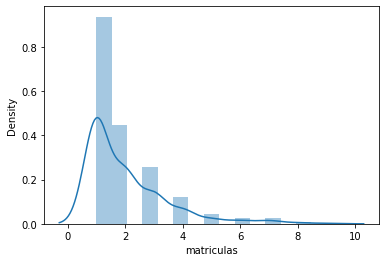

In [ ]:
sns.distplot(nomes.matriculas)

In [ ]:
nomes.matriculas.value_counts()

1    200
2     95
3     55
4     26
5      9
7      6
6      6
8      2
9      1
Name: matriculas, dtype: int64

In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
23,FERNANDO,321,@dominiodoemail.com.br,fernando@dominiodoemail.com.br,2
169,JOELMA,394,@dominiodoemail.com.br,joelma@dominiodoemail.com.br,1
148,APARECIDO,332,@dominiodoemail.com.br,aparecido@dominiodoemail.com.br,3
24,CLAUDIA,16,@dominiodoemail.com.br,claudia@dominiodoemail.com.br,4
105,MILENA,371,@dominiodoemail.com.br,milena@dominiodoemail.com.br,1


# **Selecionando cursos**

In [ ]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
175,RIAN,209,@dominiodoemail.com.br,rian@dominiodoemail.com.br,2
96,TANIA,211,@dominiodoemail.com.br,tania@dominiodoemail.com.br,4
116,DOMINGOS,150,@servicodoemail.com,domingos@servicodoemail.com,1


In [ ]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [ ]:
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns=['id_aluno', 'id_curso'])

In [ ]:
matriculas.head()

,id_aluno,id_curso
0,235,12
1,43,14
2,43,3
3,304,7
4,156,3


In [ ]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno': 'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,18,Lógica de programação
2,34,Java para Web
3,41,C# para Web
4,17,Ruby on Rails
5,53,Cursos de Python
6,63,PHP com MySql
7,36,.NET para web
8,50,Novas integrações com Java
9,11,TDD com Java


In [ ]:
nomes.head(3)

,nome,id_aluno,dominio,email,matriculas
0,MARIA,235,@dominiodoemail.com.br,maria@dominiodoemail.com.br,1
1,ANA,43,@servicodoemail.com,ana@servicodoemail.com,2
2,FRANCISCA,304,@servicodoemail.com,francisca@servicodoemail.com,1


In [ ]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [ ]:
matriculas.head()

,id_aluno,id_curso
0,235,12
1,43,14
2,43,3
3,304,7
4,156,3


In [ ]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno': 'quantidade_de_alunos'})

In [ ]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,18,Lógica de programação
2,34,Java para Web
3,41,C# para Web
4,17,Ruby on Rails
5,53,Cursos de Python


# **Saída em diferentes formatos**

In [ ]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index=False)

In [ ]:
pd.read_csv('matriculas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,18,Lógica de programação
1,34,Java para Web
2,41,C# para Web
3,17,Ruby on Rails
4,53,Cursos de Python
5,63,PHP com MySql
6,36,.NET para web
7,50,Novas integrações com Java
8,11,TDD com Java
9,1,Código limpo com C#


In [ ]:
matriculas_json = matriculas_por_curso.to_json()

In [ ]:
matriculas_json

'{"quantidade_de_alunos":{"1":18,"2":34,"3":41,"4":17,"5":53,"6":63,"7":36,"8":50,"9":11,"10":1,"11":20,"12":69,"13":7,"14":63,"15":81,"16":45,"17":70,"18":17,"19":57,"20":54},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [ ]:
matriculas_html = matriculas_por_curso.to_html()

In [ ]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>18</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>34</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>41</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>17</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>53</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>63</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>36</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>50</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>11</td>


# **Criando o banco sql**

In [ ]:
!pip install sqlalchemy

In [ ]:
from sqlalchemy import create_engine, MetaData, Table

In [ ]:
engine = create_engine('sqlite:///:memory:')

In [ ]:
engine

Engine(sqlite:///:memory:)

In [ ]:
type(engine)

sqlalchemy.engine.base.Engine

In [ ]:
matriculas_por_curso.to_sql('matriculas', engine)

In [ ]:
print(engine.table_names())

['matriculas']


# **Buscando do banco sql**

In [ ]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [ ]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,1,18,Lógica de programação
1,4,17,Ruby on Rails
2,9,11,TDD com Java
3,10,1,Código limpo com C#
4,13,7,Persistência com .NET
5,18,17,Programação funcional


In [ ]:
pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,18
1,Java para Web,34
2,C# para Web,41
3,Ruby on Rails,17
4,Cursos de Python,53
5,PHP com MySql,63
6,.NET para web,36
7,Novas integrações com Java,50
8,TDD com Java,11
9,Código limpo com C#,1


In [ ]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

In [ ]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 80')

In [ ]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
14,Análise de dados,81


# **Escrevendo no banco**

In [ ]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [ ]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


# **Nomes do alunos e alunas da próxima turma**

In [ ]:
matriculas_por_curso.head(20)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,18,Lógica de programação
2,34,Java para Web
3,41,C# para Web
4,17,Ruby on Rails
5,53,Cursos de Python
6,63,PHP com MySql
7,36,.NET para web
8,50,Novas integrações com Java
9,11,TDD com Java


In [ ]:
matriculas

,id_aluno,id_curso
0,235,12
1,43,14
2,43,3
3,304,7
4,156,3
...,...,...
802,383,7
803,383,5
804,366,8
805,366,16


In [ ]:
id_curso = 16
proxima_turma = matriculas.query(f'id_curso == {id_curso}')
proxima_turma

,id_aluno,id_curso
17,379,16
21,218,16
34,185,16
37,191,16
56,49,16
62,242,16
68,103,16
89,268,16
95,268,16
111,241,16


In [ ]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
66,PRISCILA,122,@servicodoemail.com,priscila@servicodoemail.com,2
138,NEUSA,75,@dominiodoemail.com.br,neusa@dominiodoemail.com.br,1
159,ARNALDO,359,@dominiodoemail.com.br,arnaldo@dominiodoemail.com.br,1


In [ ]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
3,16,VALDEMIR,@dominiodoemail.com.br,valdemir@dominiodoemail.com.br,1
6,16,CINTIA,@servicodoemail.com,cintia@servicodoemail.com,2
8,16,IRACI,@servicodoemail.com,iraci@servicodoemail.com,4
29,16,LUCAS,@servicodoemail.com,lucas@servicodoemail.com,3
39,16,DENISE,@servicodoemail.com,denise@servicodoemail.com,2
40,16,WELLINGTON,@servicodoemail.com,wellington@servicodoemail.com,2
49,16,BEATRIZ,@dominiodoemail.com.br,beatriz@dominiodoemail.com.br,2
53,16,JANAINA,@dominiodoemail.com.br,janaina@dominiodoemail.com.br,5
53,16,JANAINA,@dominiodoemail.com.br,janaina@dominiodoemail.com.br,5


In [ ]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
3        VALDEMIR
6          CINTIA
8           IRACI
29          LUCAS
39         DENISE
40     WELLINGTON
49        BEATRIZ
53        JANAINA
53        JANAINA
54      MARGARIDA
63        LUCIANO
72       GABRIELE
72       GABRIELE
72       GABRIELE
103        JOSEFA
104        MILTON
115        SILVIA
157         LEILA
177        ISAIAS
182        NICOLE
185       JESSICA
191         JULIA
214         JAIME
218        CAMILA
226      VALDECIR
236      LEONARDO
241         LUCIA
242         SONIA
244     VANDERLEI
260       VICENTE
264        TERESA
268       MARLENE
268       MARLENE
294         DIEGO
298        GISELE
305        ADEMIR
349        DAMIAO
352        SAMARA
366       GEOVANE
373       EMERSON
379      PATRICIA
386        YASMIN
390        MARCOS
393         JOSUE
395      MAURICIO
Name: nome, dtype: object

In [ ]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
3,VALDEMIR
6,CINTIA
8,IRACI
29,LUCAS
39,DENISE
40,WELLINGTON
49,BEATRIZ
53,JANAINA
53,JANAINA


In [ ]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Estatística básica
Name: 16, dtype: object

In [ ]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Estatística básica'

In [ ]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()
proxima_turma

,nome
id_aluno,
3,VALDEMIR
6,CINTIA
8,IRACI
29,LUCAS
39,DENISE
40,WELLINGTON
49,BEATRIZ
53,JANAINA
53,JANAINA


In [ ]:
proxima_turma = proxima_turma.rename(columns={'nome': f'Alunos do curso de {nome_curso}'})

In [ ]:
proxima_turma = proxima_turma.drop_duplicates()
proxima_turma

,Alunos do curso de Estatística básica
id_aluno,
3,VALDEMIR
6,CINTIA
8,IRACI
29,LUCAS
39,DENISE
40,WELLINGTON
49,BEATRIZ
53,JANAINA
54,MARGARIDA


# **Excel**

In [ ]:
proxima_turma.to_excel('proxima_turma.xlsx', index=False)

In [ ]:
pd.read_excel('proxima_turma.xlsx')

,Alunos do curso de Estatística básica
0,VALDEMIR
1,CINTIA
2,IRACI
3,LUCAS
4,DENISE
5,WELLINGTON
6,BEATRIZ
7,JANAINA
8,MARGARIDA
9,LUCIANO
